In [28]:
import yt 
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


To get the sink particle activated, we need a density rise, which we previously didn't get. But now if we use a huge fattening factor, we should get a couple orders of magnitude of density rise really quick 

In [30]:
# Simple script for calculating sink parameters 
rho = 1.0e-16
G = 6.67e-8
c_s  = 28730.5 #cm/s (based on T = 10K) 
jeans_length = sqrt(pi*c_s**2/(G*rho))
boxlen =1e19
lev_max = 5
cell_size = boxlen/(2**(lev_max+2))
rho_threshold = pi*c_s**2/(4*G*jeans_length**2)
r_acc = 2.5*cell_size
rho_threshold=  pi*c_s**2/(4*G*r_acc**2)

In [31]:
print "sink_density_thresh = ", rho_threshold
print "sink_accretion_radius = ", r_acc
print "sink_softening_radius = ", r_acc

sink_density_thresh =  2.54794669312e-19
sink_accretion_radius =  1.953125e+17
sink_softening_radius =  1.953125e+17


The second definition seems a bit recursive. Shouldn't the threshold be larger than the central density?? '

In [32]:
print pi*c_s**2/(4*G*r_acc**2)
print pi*c_s**2/(G*jeans_length**2)

2.54794669312e-19
1e-16


In [34]:
def plot_all(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    slc.annotate_grids()
#     slc.set_log("all", False)
    slc.set_cmap("all","rainbow")
    slc.show()

    physical_quantity="pressure"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
    slc.set_log("all", False)
    # slc.set_zlim(physical_quantity,58,60)
    slc.show()

    physical_quantity="temperature"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
#     slc.set_zlim(physical_quantity,58,60)
    slc.set_log("all", False)
    slc.show()


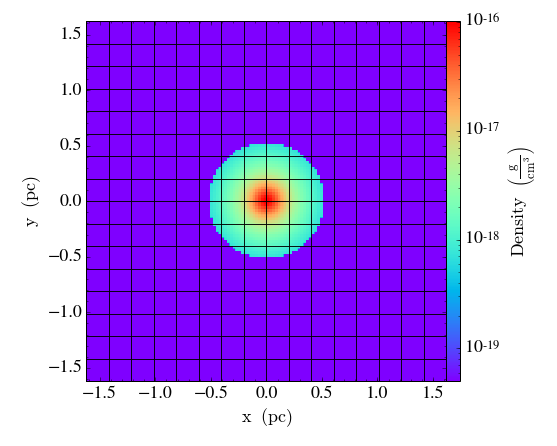


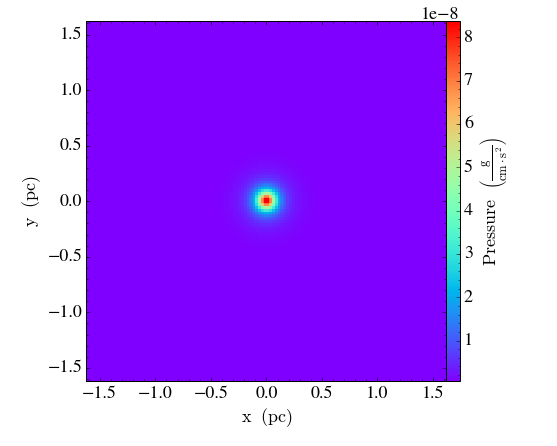


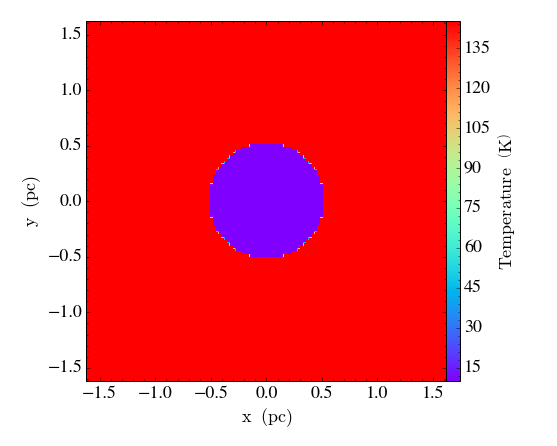

In [35]:
plot_all(0)

In [38]:
dd = ds.all_data()
print dd["particle_position_x"]
print dd["particle_position_y"]
print dd["particle_position_z"]

YTFieldNotFound: Could not find field '('all', 'particle_position_x')' in sod_hdf5_chk_0000.

# yt says "but particle files are not currently directly loadable by themselves, due to the fact that they typically lack grid information. "

In [37]:
i=0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_grids()
slc.annotate_particles()
#     slc.set_log("all", False)
slc.set_cmap("all","rainbow")
slc.show()

TypeError: __init__() takes at least 2 arguments (1 given)

Now I get this and it just segfaults 

In [40]:
import h5py
import numpy as np
f=h5py.File("sod_hdf5_part_0000",'r')

In [41]:
f.keys()

[u'integer runtime parameters',
 u'integer scalars',
 u'localnp',
 u'logical runtime parameters',
 u'logical scalars',
 u'real runtime parameters',
 u'real scalars',
 u'sim info',
 u'string runtime parameters',
 u'string scalars',
 u'unknown names']

In [63]:
from __future__ import print_function
printgroups = lambda name: print(name)
f.visit(printgroups)

integer runtime parameters
integer scalars
localnp
logical runtime parameters
logical scalars
real runtime parameters
real scalars
sim info
string runtime parameters
string scalars
unknown names


In [43]:
# f['particle names'][:]

In [52]:
for i in f['integer runtime parameters']:
    print i

('bndpriorityone                                                                  ', 1)
('bndprioritythree                                                                ', 3)
('bndprioritytwo                                                                  ', 2)
('checkpointfileintervalstep                                                      ', 0)
('checkpointfilenumber                                                            ', 0)
('dr_abortpause                                                                   ', 2)
('drift_break_inst                                                                ', 0)
('drift_trunc_mantissa                                                            ', 2)
('drift_verbose_inst                                                              ', 0)
('eos_entrelescalechoice                                                          ', 6)
('fileformatversion                                                               ', 9)
('forcedplotfilenumber          